In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:

data = pd.read_csv('/content/drive/My Drive/csv/label.csv')

In [5]:
data

,Emotion,Sentence
0,Surprise,তৃণমূলের সাবেক মন্ত্রী শুভেন্দু সম্প্রতি মমতার...
1,Happy,রাস্তার দুই পাশের মধ্যে একটি দোকানে চমৎকার খাদ...
2,Sad,গতকাল আমি আমার কপ্লের সাথে কিছু বন্ধুর সাথে ইফ...
3,Happy,"শহরের সেরা বারবিকিউ, গ্রিল মধ্যে একটি। তাদের স..."
4,Sad,ইফতারের জন্য অনেক চাপ ছিল যা কারণে মান সম্পূর্...
...,...,...
9257,Neutral,"খাবারটা ভালো ছিল, বিশেষত বিফ বেন্তো এবং তরমুজে..."
9258,Happy,তুমি যাও এখানে এবং তাদের স্টেক চেষ্টা করো।
9259,Happy,এখানে স্টেক খুবই সুস্বাদু ... পছন্দ করেছি ... ...
9260,Neutral,বসবাস ব্যবস্থা ভালো নয় .. জায়গাটা অনেকটা ছোট...


In [6]:
data.columns

Index(['Emotion', 'Sentence'], dtype='object')

In [7]:
data.isnull().sum()

Emotion     0
Sentence    0
dtype: int64

In [8]:
print(data['Emotion'].unique())

['Surprise' 'Happy' 'Sad' 'Disgust' 'Neutral' 'Angry' 'Fearful']


In [9]:
print("Total Reviews:",len(data),
      "\nTotal Surprise Reviews:",len(data[data.Emotion =='Surprise']),
      "\nTotal Happy Reviews:",len(data[data.Emotion=='Happy']),
      "\nTotal Neutral Reviews:",len(data[data.Emotion =='Neutral']),
      "\nTotal Sad Reviews:",len(data[data.Emotion =='Sad']),
      "\nTotal Disgust Reviews:",len(data[data.Emotion =='Disgust']),
      "\nTotal Angry Reviews:",len(data[data.Emotion =='Angry']),
      "\nTotal Fearful Reviews:",len(data[data.Emotion =='Fearful']),


      )

Total Reviews: 9262 
Total Surprise Reviews: 1148 
Total Happy Reviews: 2416 
Total Neutral Reviews: 187 
Total Sad Reviews: 1939 
Total Disgust Reviews: 1038 
Total Angry Reviews: 1549 
Total Fearful Reviews: 985


In [10]:
sample_data = [10,99,150,200,600,650,666,689,640,650,750,800,1000]
for i in sample_data:
      print(data.Sentence[i],'\n','Sentiment:-- ',data.Emotion[i],'\n')


ইফতার প্ল্যাটটি খুব খারাপ ছিল। সম্পূর্ণ খাবারটি ঠাণ্ডা পরিবেশন করা হয়েছিল। ভাতটি খুবই কঠিন ছিল। এই ইফতার প্ল্যাটের সাথে খুব নিরাশ হয়েছি। 
 Sentiment:--  Disgust 

এই পোস্টটি দেখে আমি শান্তি অনুভব করছি। সেটা আমার মনে প্রশান্তি এনে দিয়েছে। 
 Sentiment:--  Happy 

এই মুভিটি দেখলে আমার হাতটি কাঁপছে! এটা অনেক ভীতিজনক ছিল। 
 Sentiment:--  Fearful 

এই পোস্টটি পড়ে আমার মনে ঘৃণা ও বিরাগ ছড়িয়ে পড়ছে। এর কোনও মতামত দিতে ইচ্ছা করছে না। 
 Sentiment:--  Disgust 

অসাধারণ খাবার.. কিছু মানুষ মূল্যের উপর অভিযোগ করতে পারে, কিন্তু আমার জন্য এটা অবশ্যই যোগ্য ছিল। ভালো কাজটি চালিয়ে যান! 
 Sentiment:--  Happy 

Spicy6 এর আকর্ষণীয় মেনু, আশ্চর্যজনক ভোজন যা ওয়েটার দ্বারা সম্পূর্ণ পরিষেবিত হয়েছিল, সাথে আশ্চর্যজনক পরিবেশ ও ক্লাসি পরিষেবা এবং পরিষেবাটি সময়ের মতোই, গরম এবং তাজা খাবার এবং খুবই ভালো। সারাদিনের সর্বোত্তম জায়গা। 
 Sentiment:--  Happy 

ভালো খাদ্য আপনাকে আবার যাত্রা করতে দেবে এমন একটি সুন্দর স্থান। 
 Sentiment:--  Happy 

স্পাইসি6 তে অসাধারণ খাদ্য ও পরিষেবা। আমি এই স্থানটি খুব ভালোবাসি। 
 

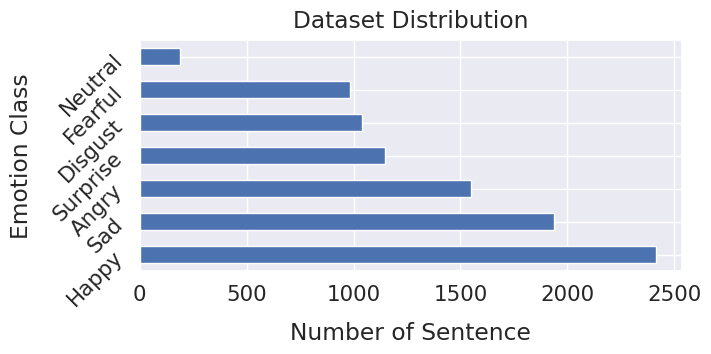

In [11]:
sns.set(font_scale=1.4)
data['Emotion'].value_counts().plot(kind='barh', figsize=(7, 3))
plt.xlabel("Number of Sentence", labelpad=12)
plt.ylabel("Emotion Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

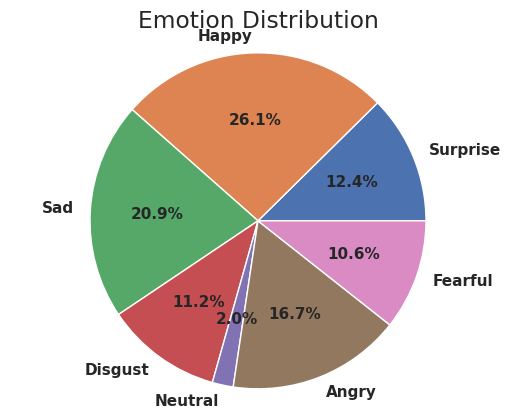

In [12]:
import matplotlib.pyplot as plt

# Corrected Data
labels = ['Surprise', 'Happy', 'Sad', 'Disgust', 'Neutral', 'Angry', 'Fearful']
counts = [1148, 2416, 1939, 1038, 187, 1549, 985]

# Plotting the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 11,'weight': 'bold'})
plt.axis('equal')
plt.title('Emotion Distribution')

# Display the chart
plt.show()


# Pre-processing Start

In [13]:
def process_comments(Sentence):
    Sentence = re.sub('[^\u0980-\u09FF]',' ',str(Sentence)) #removing unnecessary punctuation
    return Sentence

In [14]:
# Apply the function into the dataframe
data['cleaned'] = data['Sentence'].apply(process_comments)

# print some cleaned reviews from the dataset
sample_data = [10,100,25,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.Sentence[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Emotion[i],'\n')

Original:
 ইফতার প্ল্যাটটি খুব খারাপ ছিল। সম্পূর্ণ খাবারটি ঠাণ্ডা পরিবেশন করা হয়েছিল। ভাতটি খুবই কঠিন ছিল। এই ইফতার প্ল্যাটের সাথে খুব নিরাশ হয়েছি। 
Cleaned:
 ইফতার প্ল্যাটটি খুব খারাপ ছিল  সম্পূর্ণ খাবারটি ঠাণ্ডা পরিবেশন করা হয়েছিল  ভাতটি খুবই কঠিন ছিল  এই ইফতার প্ল্যাটের সাথে খুব নিরাশ হয়েছি  
 Sentiment:--  Disgust 

Original:
 আমি মনে করি এই মন্তব্যটি ঘৃণাসম্পন্ন এবং অপছন্দজনক। কেন এমন ঘৃণা জনক কিছু লিখতে হয়? 
Cleaned:
 আমি মনে করি এই মন্তব্যটি ঘৃণাসম্পন্ন এবং অপছন্দজনক  কেন এমন ঘৃণা জনক কিছু লিখতে হয়  
 Sentiment:--  Disgust 

Original:
 এটি পরিবারের জন্য খুব ভালো স্থান। বিশেষত খেলার মাঠ এবং খাবারটি সত্যিই অসাধারণ এবং সুস্বাদু। 
Cleaned:
 এটি পরিবারের জন্য খুব ভালো স্থান  বিশেষত খেলার মাঠ এবং খাবারটি সত্যিই অসাধারণ এবং সুস্বাদু  
 Sentiment:--  Happy 

Original:
 Wari Food Lounge-এ সুন্দর ,সুস্বাদু এবং বিশেষত স্বাচ্ছতায় বজ্ঞাপন হয়েছে 11 দিন আর বাকি আছে স্বাদে মজাদার এবং বিভিন্ন খাদ্য স্বাদ উপভোগ করতে ক্ষেত্রটি মিস করবেন না 
Cleaned:
                  এ সুন্দর  সুস্বাদু এবং

In [15]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 27 Small Reviews 
Total Reviews: 9235


In [16]:
def data_summary(dataset):


    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Emotion.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.Emotion==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Emotion==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Emotion==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:20]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the function
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  Happy
Number of Documents:2397
Number of Words:31365
Number of Unique Words:5714
Most Frequent Words:

ভালো	421
এবং	395
জন্য	312
আমি	296
খুব	243
অসাধারণ	229
এই	223
ধন্যবাদ	190
না	188
হবে	183
তাদের	182
ও	176
ভাল	172
খাদ্য	163
করে	160
সুন্দর	146
আর	141
ছিল	140
খাবার	139
একটি	133

Class Name :  Sad
Number of Documents:1939
Number of Words:30239
Number of Unique Words:6039
Most Frequent Words:

না	590
করে	304
আর	272
এই	236
কি	182
হবে	178
করা	163
ও	155
কিন্তু	147
জন্য	144
কিছু	136
থেকে	133
আমরা	128
আমাদের	125
এর	116
করতে	115
নেই	115
তাদের	114
এ	113
কোন	113

Class Name :  Angry
Number of Documents:1549
Number of Words:24699
Number of Unique Words:4431
Most Frequent Words:

না	423
করে	297
এই	236
আর	231
হবে	203
কি	197
জন্য	137
করতে	136
হয়	136
নয়	133
করা	131
নির্বাচন	125
ও	122
কথা	118
থেকে	114
উচিত	112
তাদের	110
কোন	109
কেন	107
যে	101

Class Name :  Surprise
Number of Documents:1143
Number of Words:13863
Number of Unique Words:3103
Most Frequent Words:

কি	207
না	166
এই	136
করে	1

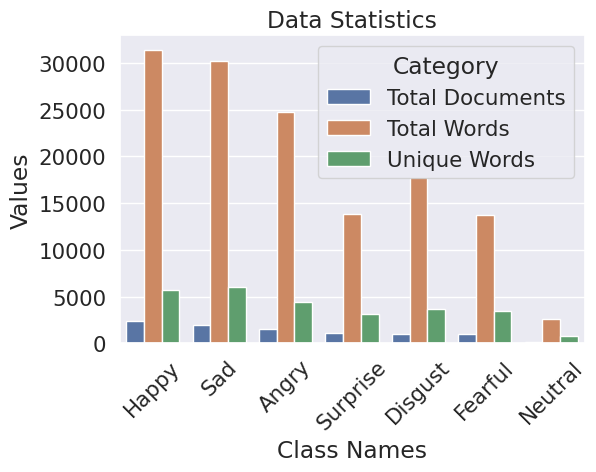

In [17]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()



sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

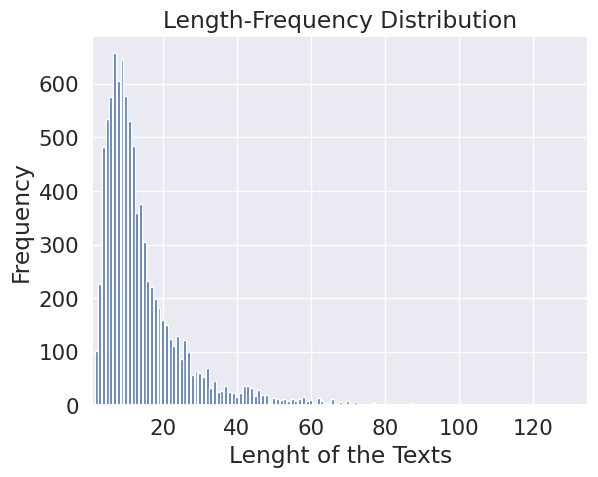

Maximum Length of a review: 141
Minimum Length of a review: 2
Average Length of a reviews: 15.0


In [18]:
#frequency distribution visualization
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

# neumeric data conversion

In [19]:
Encoder = LabelEncoder()
dataset["Emotion"] = Encoder.fit_transform(dataset["Emotion"])



In [20]:
dataset["Emotion"].value_counts()

3    2397
5    1939
0    1549
6    1143
1    1038
2     985
4     184
Name: Emotion, dtype: int64

In [21]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(dataset["Sentence"])

# Check our matrix shape
X.shape

(9235, 5000)

In [22]:
# Declaring our target variable
y = dataset["Emotion"]

# data sampling

In [23]:
#overhead sampling
from imblearn.over_sampling import SMOTE
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [24]:
y_final.value_counts()


6    2397
3    2397
5    2397
1    2397
4    2397
0    2397
2    2397
Name: Emotion, dtype: int64

# Model training

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.1, random_state = 42)

In [26]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

SVM Algorithm part

In [27]:

# Create an SVM classifier (Support Vector Classifier)
clf = svm.SVC(kernel='linear', C=1)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Print the accuracy of the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.699642431466031


In [28]:
Classifiersv =svm.SVC()
Classifiersv.fit(X_train, y_train)

Prediction = Classifiersv.predict(X_test)

In [29]:
accuracy_score(y_test, Prediction)


0.7568533969010727

In [30]:
ConfusionMatrixsvm= confusion_matrix(y_test, Prediction)

In [31]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")

  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


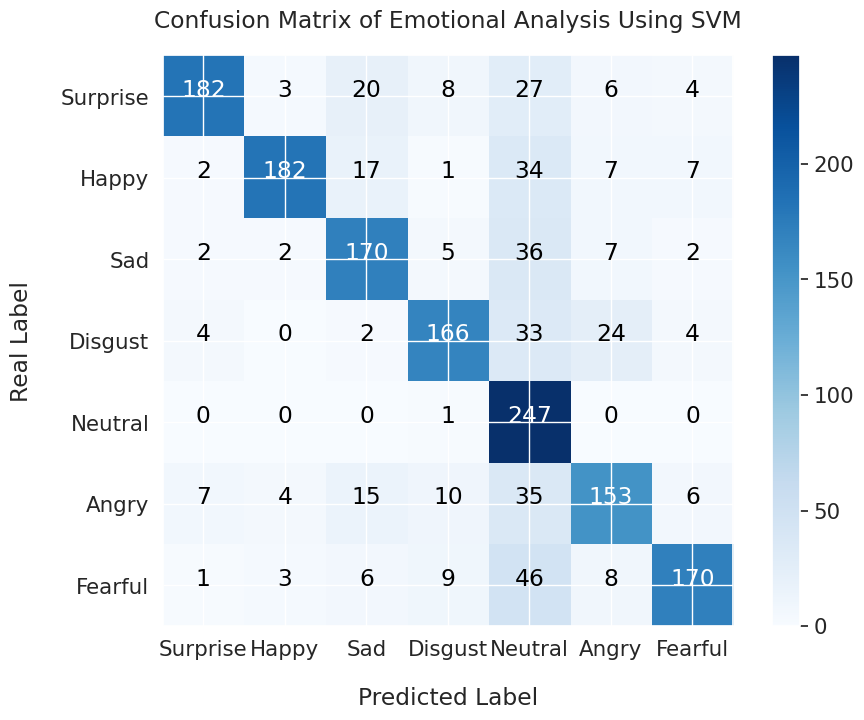

In [32]:

plt.figure(figsize=(9, 7))
plot_cm(ConfusionMatrixsvm, classes = ['Surprise', 'Happy' ,'Sad', 'Disgust', 'Neutral', 'Angry' ,'Fearful'], title = "Confusion Matrix of Emotional Analysis Using SVM")


In [33]:
svmresult=classification_report(y_test, Prediction)
print(svmresult)

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       250
           1       0.94      0.73      0.82       250
           2       0.74      0.76      0.75       224
           3       0.83      0.71      0.77       233
           4       0.54      1.00      0.70       248
           5       0.75      0.67      0.70       230
           6       0.88      0.70      0.78       243

    accuracy                           0.76      1678
   macro avg       0.80      0.76      0.76      1678
weighted avg       0.80      0.76      0.76      1678



Tarining  DecisionTreee,LogisticRegression,RandomForest

In [34]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression(random_state = 123)
SVC = SVC()
RForest = RandomForestClassifier()


Models = [DTree, LogReg, SVC, RForest, ]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest"}

for i, model in enumerate(Models):
 print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))


Decision Tree Test Accuracy: 0.6478787644280601


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Test Accuracy: 0.5916803853423571
SVC Test Accuracy: 0.6552331471345556
Random Forest Test Accuracy: 0.6544810822979837


Randomforest

In [35]:
Classifierrf =RandomForestClassifier()
Classifierrf.fit(X_train, y_train)


RandomForestClassifier()

In [36]:
Predictionrf = Classifierrf.predict(X_test)
accuracy_score(y_test, Predictionrf)


0.7616209773539928

In [37]:
ConfusionMatrixRF= confusion_matrix(y_test, Prediction)

In [38]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")

  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


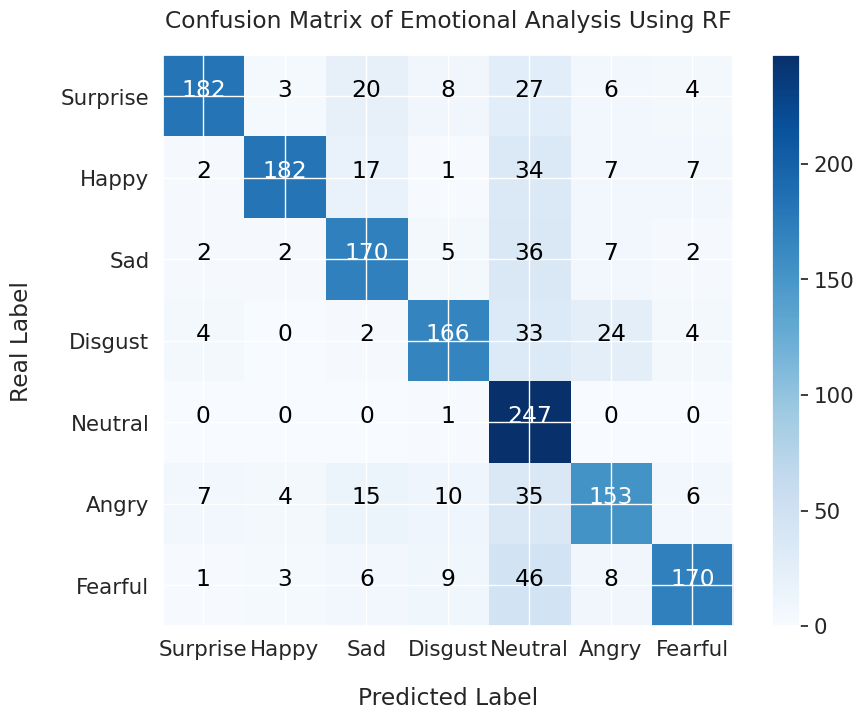

In [39]:
plt.figure(figsize=(9, 7))
plot_cm(ConfusionMatrixRF, classes = ['Surprise', 'Happy' ,'Sad', 'Disgust', 'Neutral', 'Angry' ,'Fearful'], title = "Confusion Matrix of Emotional Analysis Using RF")


In [59]:
LRresult=classification_report(y_test, Prediction)
print(LRresult)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       250
           1       0.91      0.82      0.86       250
           2       0.82      0.75      0.78       224
           3       0.86      0.66      0.74       233
           4       0.95      0.85      0.90       248
           5       0.80      0.67      0.73       230
           6       0.51      0.91      0.65       243

    accuracy                           0.78      1678
   macro avg       0.82      0.78      0.79      1678
weighted avg       0.82      0.78      0.79      1678



DecisionTree

In [41]:
Classifierdt =DecisionTreeClassifier()
Classifierdt.fit(X_train, y_train)
Predictiondt = Classifierdt.predict(X_test)
accuracy_score(y_test, Predictiondt)




0.7491060786650775

In [42]:
ConfusionMatrixdt= confusion_matrix(y_test, Prediction)

Unnormalized Confusion Matrix


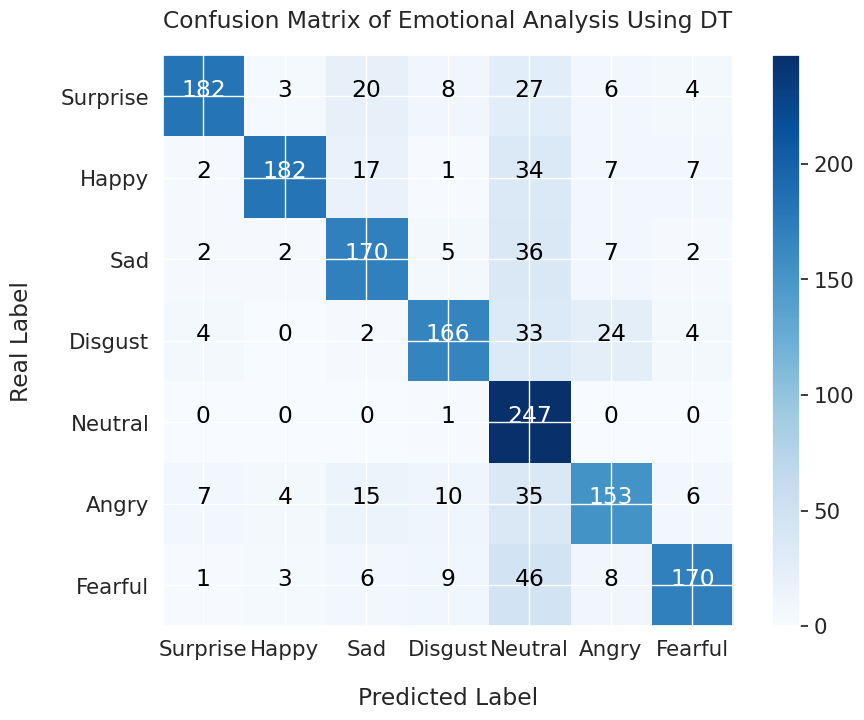

In [43]:
plt.figure(figsize=(9, 7))
plot_cm(ConfusionMatrixdt, classes = ['Surprise', 'Happy' ,'Sad', 'Disgust', 'Neutral', 'Angry' ,'Fearful'], title = "Confusion Matrix of Emotional Analysis Using DT")


In [60]:
Dtresult=classification_report(y_test, Prediction)
print(Dtresult)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       250
           1       0.91      0.82      0.86       250
           2       0.82      0.75      0.78       224
           3       0.86      0.66      0.74       233
           4       0.95      0.85      0.90       248
           5       0.80      0.67      0.73       230
           6       0.51      0.91      0.65       243

    accuracy                           0.78      1678
   macro avg       0.82      0.78      0.79      1678
weighted avg       0.82      0.78      0.79      1678



Hyper tuning ploting
LR

In [46]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")

  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

In [50]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")

  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

In [51]:
 #hiper tuning apply in LR
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

Best Accuracy: 77.30 %
Best Parameters: {'C': 2222.996482526191, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:

Classifierlr = LogisticRegression(random_state = 42, C = 2222.996482526191, penalty = 'l2')
Classifierlr.fit(X_train, y_train)

Prediction = Classifierlr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
accuracy_score(y_test, Prediction)

0.7818831942789034

In [54]:
ConfusionMatrixLR= confusion_matrix(y_test, Prediction)


In [55]:

# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")

  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)


Unnormalized Confusion Matrix


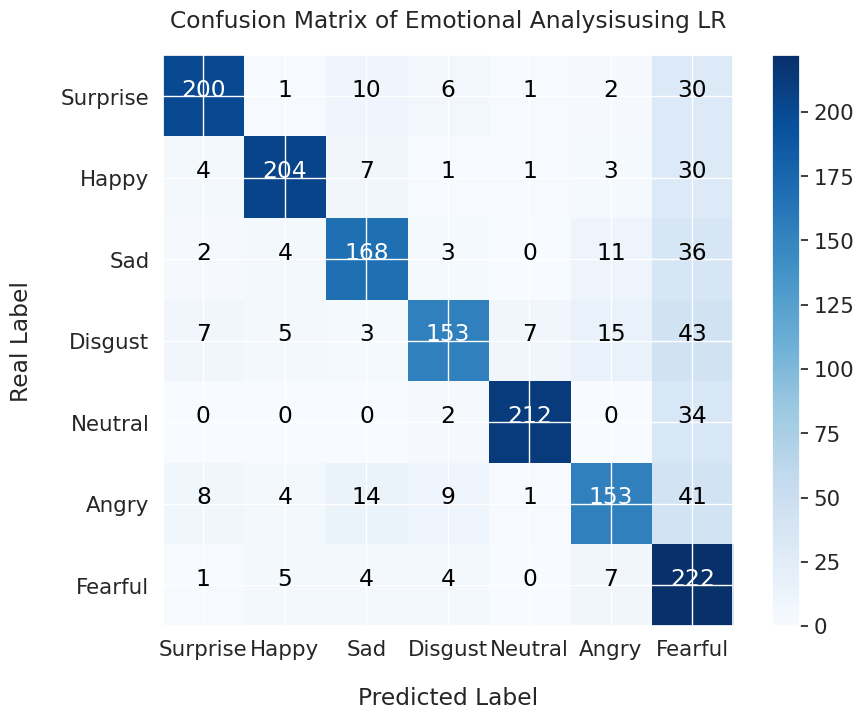

In [56]:
plt.figure(figsize=(9, 7))
plot_cm(ConfusionMatrixLR, classes = ['Surprise', 'Happy', 'Sad', 'Disgust', 'Neutral', 'Angry' , 'Fearful'], title = "Confusion Matrix of Emotional Analysisusing LR")


In [57]:
lrresult=classification_report(y_test, Prediction)
print(lrresult)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       250
           1       0.91      0.82      0.86       250
           2       0.82      0.75      0.78       224
           3       0.86      0.66      0.74       233
           4       0.95      0.85      0.90       248
           5       0.80      0.67      0.73       230
           6       0.51      0.91      0.65       243

    accuracy                           0.78      1678
   macro avg       0.82      0.78      0.79      1678
weighted avg       0.82      0.78      0.79      1678



# Evaluation

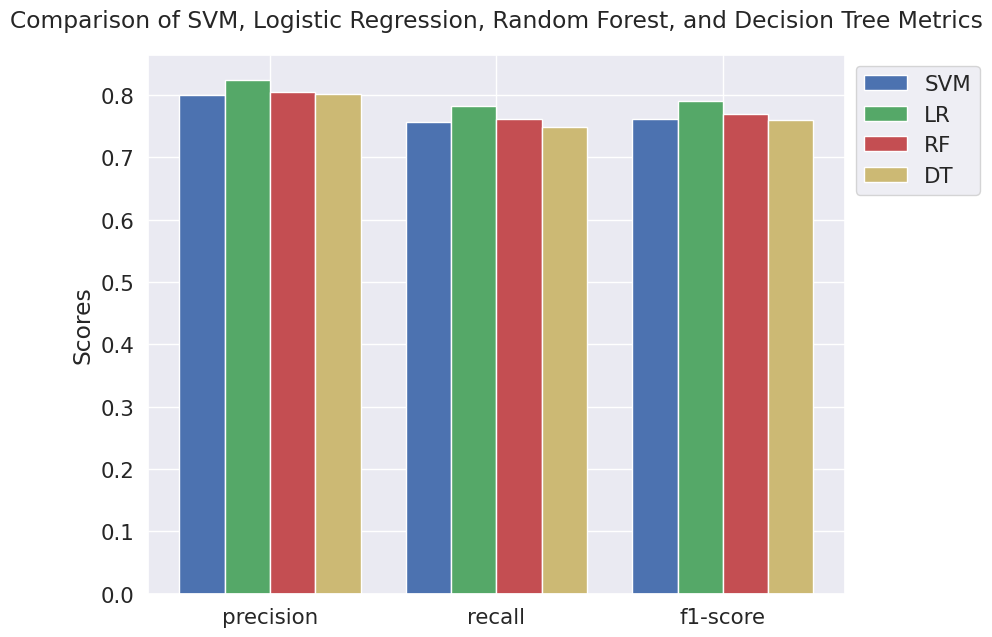

In [58]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your SVM, Logistic Regression, Random Forest, and Decision Tree models and made predictions
svm_pred = Classifiersv.predict(X_test)
lr_pred = Classifierlr.predict(X_test)
rf_pred = Classifierrf.predict(X_test)
dt_pred = Classifierdt.predict(X_test)

# Generate classification reports for SVM, Logistic Regression, Random Forest, and Decision Tree
svm_report = classification_report(y_test, svm_pred, output_dict=True)
lr_report = classification_report(y_test, lr_pred, output_dict=True)
rf_report = classification_report(y_test, rf_pred, output_dict=True)
dt_report = classification_report(y_test, dt_pred, output_dict=True)

# Extract precision, recall, and F1-score for all four models
svm_metrics = svm_report['weighted avg']
lr_metrics = lr_report['weighted avg']
rf_metrics = rf_report['weighted avg']
dt_metrics = dt_report['weighted avg']

# Extract metric names and scores
metric_names = ['precision', 'recall', 'f1-score']
svm_scores = [svm_metrics[metric] for metric in metric_names]
lr_scores = [lr_metrics[metric] for metric in metric_names]
rf_scores = [rf_metrics[metric] for metric in metric_names]
dt_scores = [dt_metrics[metric] for metric in metric_names]

# Create bar chart
x = np.arange(len(metric_names))
width = 0.2

fig, ax = plt.subplots(figsize=(9, 7))
rects1 = ax.bar(x - 1.5 * width, svm_scores, width, label='SVM', color='b')
rects2 = ax.bar(x - 0.5 * width, lr_scores, width, label='LR', color='g')
rects3 = ax.bar(x + 0.5 * width, rf_scores, width, label='RF', color='r')
rects4 = ax.bar(x + 1.5 * width, dt_scores, width, label='DT', color='y')

ax.set_ylabel('Scores')
ax.set_title('Comparison of SVM, Logistic Regression, Random Forest, and Decision Tree Metrics', pad=20)  # Adjust the pad parameter to change title position

# Set custom label positions and labels for x-axis ticks
custom_xticks = x
custom_xticklabels = metric_names

ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)

# Move the legend outside the columns
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Real-time Evaluation


1. তৃণমূলের সাবেক মন্ত্রী শুভেন্দু সম্প্রতি মমতার সাহচর্য ছেড়ে বিজেপিতে যোগ দিয়েছেন।- Surprise
2. খাবারটি ভালো ছিল। অসাধারণ অভিজ্ঞতা ছিল :) অবশ্যই পরামর্শ দিতে হবে।-Happy
3. স্থানটি এন্ট্রি, নিরাপত্তা সিস্টেম উন্নত করেছে। পার্কিং স্থান রয়েছে। ভালো পরিবেশ রয়েছে। মূল্য কিছুটা বেশি, কিন্তু শান্ত রাত্রির জন্য এটি সম্পূর্ণ। খাবার পরিবেশন করার জন্য কিছু বেশি সময় লাগে। কিন্তু খাবার মানুষ মনোনয়ন দেয়, যা আমি উল্লেখ করতে হবে, যা খুব ভালো। আপনার গ্রাহকদের স্বাগত জানান, যা আমি উল্লেখ করতে হবে, যা সুন্দর।-Neutral
4. এই স্থানে পিজা অর্ডার করা উচিত নয়। এটি গড় মানদণ্ডের নীচে ছিল। ঘরে তৈরি পিজার চেয়ে এটি অনেক ভালো। কোড F 14: তারা 20 টি লিখে আকর্ষণ করে, কিন্তু আপনাকে বলে দেয় না যে এটি শুধুমাত্র একটি পূর্ণ চিকেন। কোড Gc10: জামাইকান চিকেন ভালো ছিল। সুপটিও ভালো ছিল এবং রুচিতের চিহ্ন ছিল। সুন্দর জায়গা কিন্তু জটিল। পার্কিং সাধারণত সমস্যা হয়। নিরাপত্তা সংরক্ষকর্মীরা বাড়ি নিয়ে খুব আগ্রহী, কিন্তু গাড়ি পার্ক করার জন্য কোনও ধারণা নেই।-sad
5. ওহো! আমি চমক পেলাম এই পোস্টটি দেখে! এটা স্বাভাবিকের বেশিরভাগের থেকে ভিন্ন ছিল।-Surprise
6. আপনার মন্তব্যটি পড়ে আমি ঘৃণা ওঠে সেটাকে। কিভাবে আপনি এই জিনিসটি বলতে পারেন?-Disgust

In [ ]:
def predict_emotion(user_input):
    # Preprocess the user input
    user_input = process_comments(user_input)


    # Vectorize the user input using the same TF-IDF vectorizer
    user_input_vectorized = TF_IDF.transform([user_input])

    # Predict the emotion for the user input using the trained Logistic Regression model
    predicted_emotion = Encoder.inverse_transform(Classifierlr.predict(user_input_vectorized))[0]

    return predicted_emotion

while True:
    user_input = input("Enter a sentence to predict emotion (type 'exit' to quit): ")

    if user_input.lower() == 'exit':
        print("\033[91m\033[1m\033[24mThank you for your time\033[0m")
        break

    predicted_emotion = predict_emotion(user_input)
    print(f"Predicted Emotion: \033[91m{predicted_emotion}\033[0m")
